In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/yuvar/Downloads/IMDb Top 2000 Movies.csv", encoding='latin-1')

In [3]:
# Select specific columns
movies_by_year = data[['Movie Name', 'Year of Release']]

# Filter by year 
movies_in_2003 = data[data['Year of Release'] == 2003]

# Find top-rated movies based on IMDB Rating
top_rated = data.sort_values('IMDB Rating', ascending=False)

# Get the top 5 movies 
top_5_movies = top_rated.head(5)

# Display the results
print("Movies by Year:\n", movies_by_year)
print("\nMovies from 2008:\n", movies_in_2003)
print("\nTop 5 Movies:\n", top_5_movies)

Movies by Year:
                  Movie Name Year of Release
0             The Godfather            1972
1          Tôkyô monogatari            1953
2      Shichinin no samurai            1954
3     The Godfather Part II            1974
4                Casablanca            1942
...                     ...             ...
1995    The Thief of Bagdad            1924
1996    Lost in Translation            2003
1997             Ying xiong            2002
1998  Sense and Sensibility            1995
1999        Nightmare Alley            1947

[2000 rows x 2 columns]

Movies from 2008:
 Empty DataFrame
Columns: [Movie Rank, Movie Name, Year of Release, IMDB Rating]
Index: []

Top 5 Movies:
      Movie Rank                                     Movie Name  \
235         236                       The Shawshank Redemption   
0             1                                  The Godfather   
3             4                          The Godfather Part II   
322         323  The Lord of the Rings: 

C:\Users\yuvar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


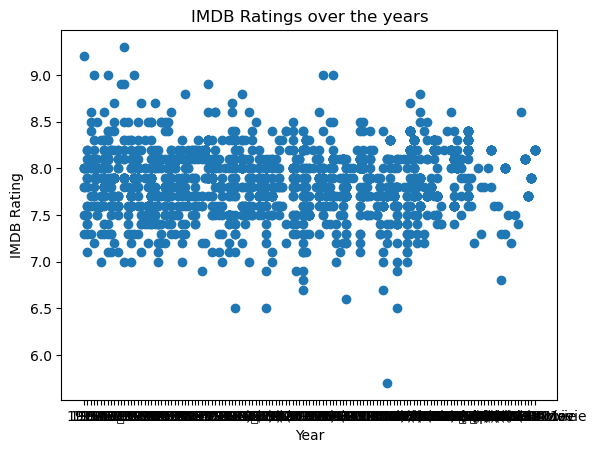

In [4]:
# filtered_movies = data[(data['Year of Release'] >= 1930) & (data['Year of Release'] <= 1980)]

# Get the data for the scatter plot
years = data['Year of Release']
ratings = data['IMDB Rating']

# Create the scatter plot
plt.scatter(years, ratings)

# Customize labels, title, etc.
plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.title('IMDB Ratings over the years')

plt.show()

C:\Users\yuvar\AppData\Local\Temp\ipykernel_18772\3186505499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Year of Release'] = pd.to_numeric(data_filtered['Year of Release'], errors='coerce')


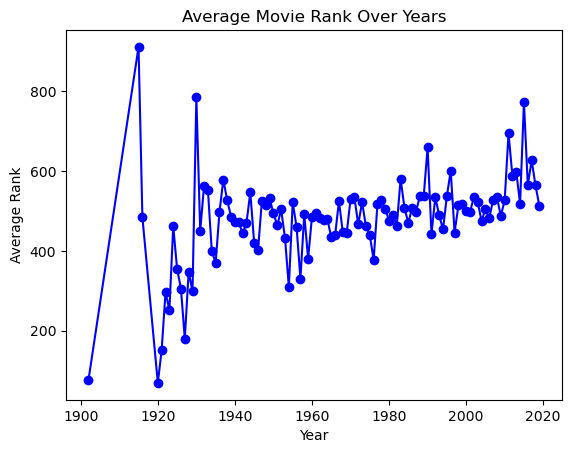

In [5]:
# Extracting the 'Year' and 'Rank' columns
data_filtered = data[['Year of Release', 'Movie Rank']]

# Ensure the 'Year' column is an integer type for plotting
data_filtered['Year of Release'] = pd.to_numeric(data_filtered['Year of Release'], errors='coerce')

# Group by 'Year' and calculate the average rank for each year
avg_ranks_per_year = data_filtered.groupby('Year of Release').mean()

# Create a line graph with the average rank per year
plt.plot(avg_ranks_per_year.index, avg_ranks_per_year['Movie Rank'], marker='o', linestyle='-', color='blue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Rank')
plt.title('Average Movie Rank Over Years')

# Display the line graph
plt.show()

In [6]:
data_filtered = data[data['IMDB Rating'] > 7] 

# Step 3: Display the filtered data
print("Movies with ratings above 7:")
print(data_filtered)

Movies with ratings above 7:
      Movie Rank             Movie Name Year of Release  IMDB Rating
0              1          The Godfather            1972          9.2
1              2       Tôkyô monogatari            1953          8.1
2              3   Shichinin no samurai            1954          8.6
3              4  The Godfather Part II            1974          9.0
4              5             Casablanca            1942          8.5
...          ...                    ...             ...          ...
1995         996    The Thief of Bagdad            1924          7.7
1996         997    Lost in Translation            2003          7.7
1997         998             Ying xiong            2002          7.9
1998         999  Sense and Sensibility            1995          7.7
1999        1000        Nightmare Alley            1947          7.7

[1974 rows x 4 columns]


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import re

In [8]:
def clean_year_string(year_str):
    # Use regular expressions to keep only digits
    cleaned_year_str = re.sub(r'[^0-9]', '', str(year_str))
    return int(cleaned_year_str)  # Convert to integer

# Apply the cleaning function to the "Year of Release" column
data['Year of Release'] = data['Year of Release'].apply(clean_year_string)

# Verify the conversion worked without errors
print(data['Year of Release'])

0       1972
1       1953
2       1954
3       1974
4       1942
        ... 
1995    1924
1996    2003
1997    2002
1998    1995
1999    1947
Name: Year of Release, Length: 2000, dtype: int64


C:\Users\yuvar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuvar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


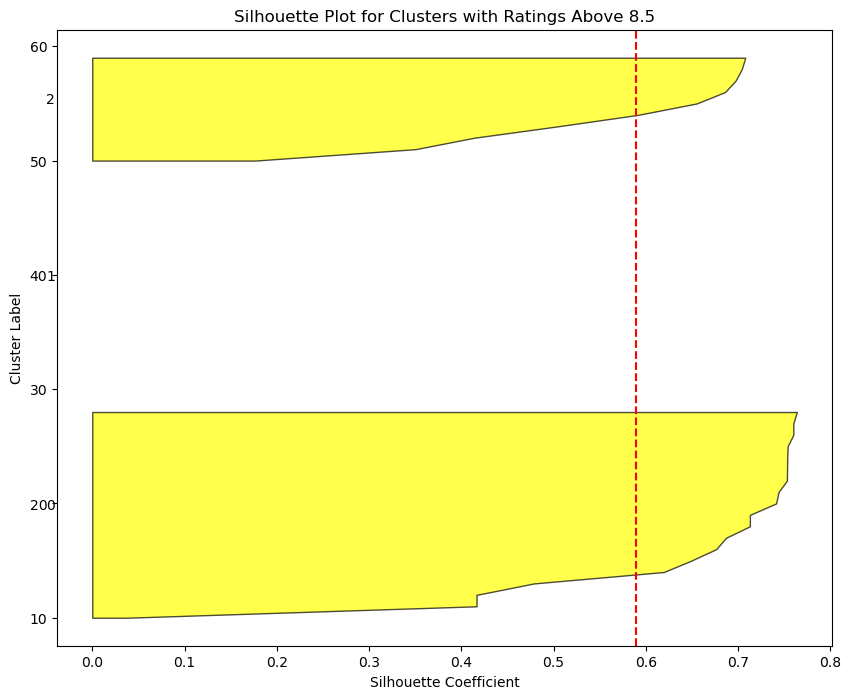

In [9]:
data['IMDB Rating'] = data['IMDB Rating'].astype(float)

# Step 1: Group by 'Movie Name' and filter for ratings consistently above 8.5
data_high_ratings = data.groupby('Movie Name').filter(lambda x: x['IMDB Rating'].min() > 8.5)

# Step 2: Apply clustering (e.g., K-means) to the cleaned data
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters
cluster_labels = kmeans.fit_predict(data_high_ratings[['Year of Release', 'IMDB Rating']])

# Step 3: Calculate silhouette scores
silhouette_avg = silhouette_score(data_high_ratings[['Year of Release', 'IMDB Rating']], cluster_labels)
silhouette_values = silhouette_samples(data_high_ratings[['Year of Release', 'IMDB Rating']], cluster_labels)

# Step 4: Create a silhouette plot
y_lower = 10
n_clusters = np.unique(cluster_labels).size  # Count unique clusters
plt.figure(figsize=(10, 8))

for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor="yellow",
        edgecolor="black",
        alpha=0.7,
    )

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))  # Label clusters

    y_lower = y_upper + 10  # Gap between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Average silhouette score

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for Clusters with Ratings Above 8.5")

# Display the plot
plt.show()

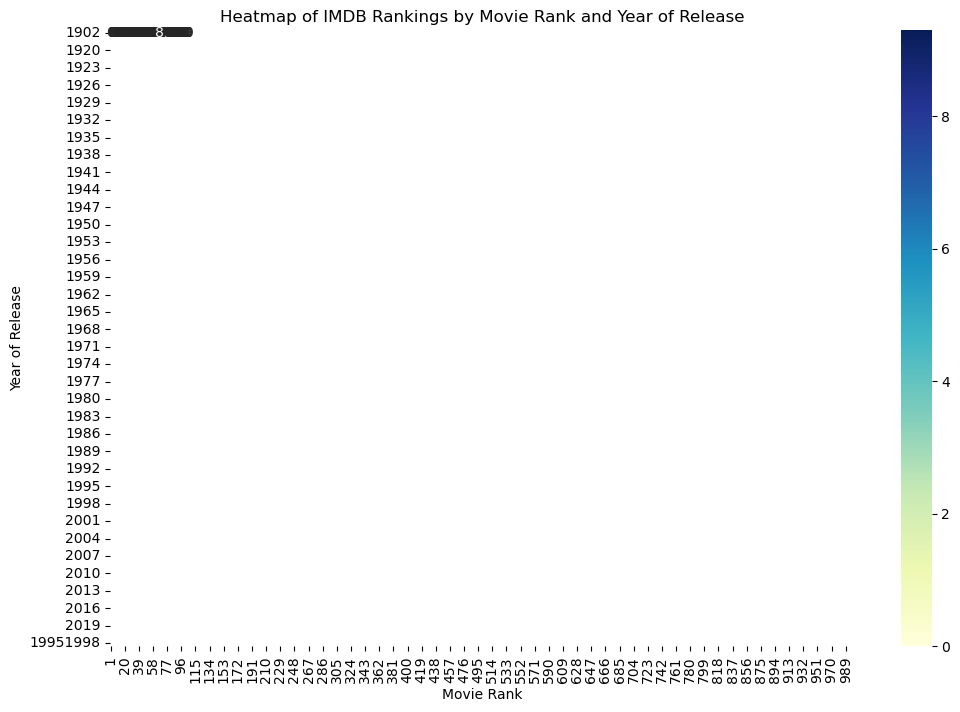

In [10]:
data_high_ratings = data.groupby('Movie Name').filter(lambda x: x['IMDB Rating'].min() > 7.5)

pivot_table = data.pivot_table(
    index='Year of Release',  # Rows will be the years
    columns='Movie Rank',     # Columns will be the movie ranks
    values='IMDB Rating',    # Values in the heatmap will be the IMDB ratings
    aggfunc='mean',           # Using 'mean' to get the average rating
    fill_value=0              # Fill empty values with 0 or another suitable value
)

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=0.5, cbar=True)

# Add labels and a title
plt.xlabel('Movie Rank')
plt.ylabel('Year of Release')
plt.title('Heatmap of IMDB Rankings by Movie Rank and Year of Release')

# Display the heatmap
plt.show()

Column names in the dataset: Index(['Movie Rank', 'Movie Name', 'Year of Release', 'IMDB Rating'], dtype='object')
Cannot find the minimum of an empty array.


C:\Users\yuvar\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


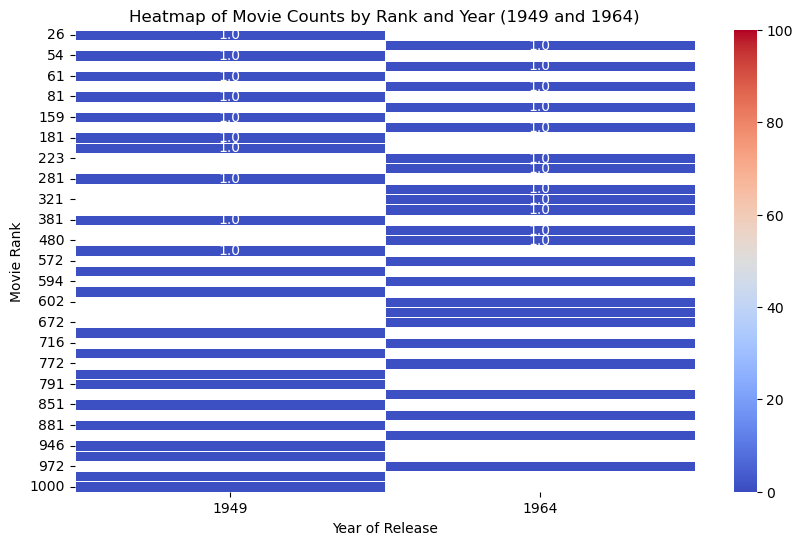

In [13]:
print("Column names in the dataset:", data.columns)

# Step 3: Filter for the years 2003 and 2004
data_filtered = data[data['Year of Release'].isin([1949,1964])]

# Step 4: Create a pivot table to count movies by rank and year of release
pivot_table = data_filtered.pivot_table(index='Movie Rank', columns='Year of Release', values='IMDB Rating', aggfunc='count')

# Step 5: Plot the heatmap with movie counts
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(
    pivot_table,
    annot=True, 
    fmt='.1f',         # Format annotations with one decimal for more detail
    cmap='coolwarm',   # Try a different color scheme
    vmin=0,            # Optionally set minimum value on colormap
    vmax=100,          # Optionally set maximum value on colormap 
    linewidths=0.5, 
    cbar=True 
)

my_array = np.array([]) # Empty array

if my_array.size > 0:
    minimum = np.fmin(my_array)
    print("The minimum value is:", minimum)
else:
    print("Cannot find the minimum of an empty array.")
    
# Adding labels and title
plt.xlabel('Year of Release')
plt.ylabel('Movie Rank')
plt.title('Heatmap of Movie Counts by Rank and Year (1949 and 1964)')

# Display the heatmap
plt.show()

Column names in the dataset: Index(['Movie Rank', 'Movie Name', 'Year of Release', 'IMDB Rating'], dtype='object')


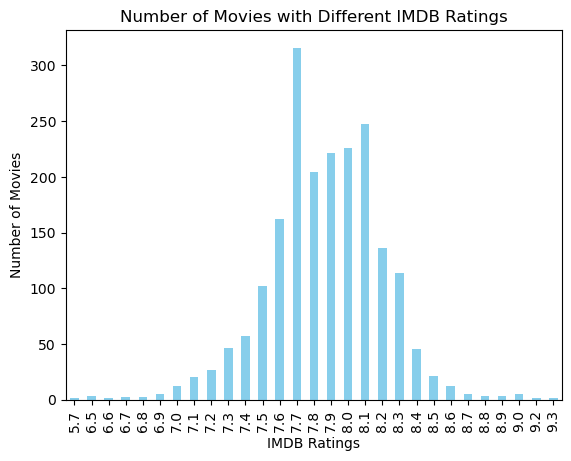

In [12]:
print("Column names in the dataset:", data.columns)

# Extracting the 'Name' and 'IMDB Ratings' columns
data_filtered = data[['Year of Release', 'IMDB Rating']]

# Group by IMDB Rating and count the number of movies with each rating
rating_counts = data_filtered.groupby('IMDB Rating').size()

# Create a bar graph with the rating counts
rating_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('IMDB Ratings')
plt.ylabel('Number of Movies')
plt.title('Number of Movies with Different IMDB Ratings')

# Display the bar graph
plt.show()